In [317]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.autograd import Variable as V

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [358]:
input_size = 13
output_size = 1
n_epoch = 1000
learning_rate = 0.1

In [359]:
boston = load_boston()
X = boston.data
Y = boston.target
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [360]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [361]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [362]:
scaler = StandardScaler()

In [363]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(np.mean(X_train))
print(np.std(X_train))
print(np.mean(X_test))
print(np.std(X_test))

1.832502162199268e-15
1.0
-0.005086716445049765
1.018584553448563


In [364]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out
net = LinearRegression(input_size, output_size)

In [365]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

In [366]:
def train(X_train, Y_train):
    inputs = V(torch.Tensor(X_train))
    targets = V(torch.Tensor(Y_train))
    
    optimizer.zero_grad()
    outputs = net(inputs)
    
    loss = loss_fn(outputs, targets)
    loss.backward()
    optimizer.step()
    
    return loss.data

In [367]:
def valid(X_test, Y_test):
    inputs = V(torch.Tensor(X_test))
    targets = V(torch.Tensor(Y_test))
    
    outputs = net(inputs)
    val_loss = loss_fn(outputs, targets)
    
    return val_loss.data

In [368]:
losses = []
val_losses = []
perm = np.arange(X_train.shape[0])
for epoch in range(n_epoch):
    np.random.shuffle(perm)
    X_train = X_train[perm]
    Y_train = Y_train[perm]

    loss = train(X_train, Y_train)
    val_loss = valid(X_test, Y_test)
    
    if epoch % 100 == 0:
        print('epoch[%d/%d] loss:%1.4f val_loss:%1.4f' % (epoch, n_epoch, loss, val_loss))
    losses.append(loss)
    val_losses.append(val_loss)

epoch[0/1000] loss:594.6202 val_loss:562.7744
epoch[100/1000] loss:197.8832 val_loss:216.7360
epoch[200/1000] loss:66.0668 val_loss:82.8709
epoch[300/1000] loss:28.0175 val_loss:43.5188
epoch[400/1000] loss:20.4446 val_loss:35.1010
epoch[500/1000] loss:19.4277 val_loss:33.7105
epoch[600/1000] loss:19.3358 val_loss:33.4961
epoch[700/1000] loss:19.3302 val_loss:33.4588
epoch[800/1000] loss:19.3300 val_loss:33.4520
epoch[900/1000] loss:19.3300 val_loss:33.4509


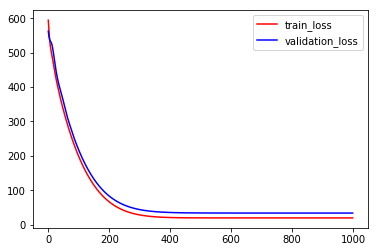

In [369]:
plt.plot(losses, 'r-', label = 'train_loss')
plt.plot(val_losses, 'b-', label = 'validation_loss')
plt.legend()
plt.show()